In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt

Found 7200 files belonging to 24 classes.


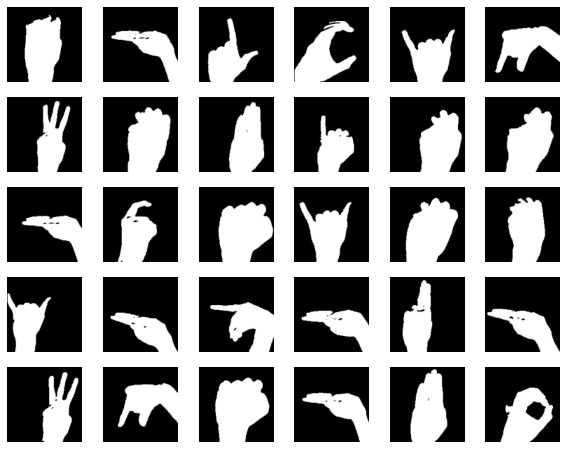

In [2]:
IMAGE_SIZE = 128
def getDataset(path):
    return tf.keras.preprocessing.image_dataset_from_directory(
        path,
        labels='inferred',
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        color_mode='grayscale',
    )

# Construct the Columbia datasets
data = getDataset('../data/created_dataset')

test = data.take(1).__iter__().get_next()[0]
fig=plt.figure(figsize=(10, 8))
columns = 6
rows = 5
for i in range(1, columns*rows +1):
    img = test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

train = data.take(150)
test = data.skip(150)

In [9]:
l = [
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),

    layers.Conv2D(16, 5, activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    
    layers.Conv2D(16, 5, activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    
    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(24, activation='softmax')
]

model = tf.keras.Sequential(l)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 124, 124, 16)      416       
_________________________________________________________________
dropout_16 (Dropout)         (None, 124, 124, 16)      0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 124, 124, 16)      64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 58, 58, 16)        6416      
_________________________________________________________________
dropout_17 (Dropout)         (None, 58, 58, 16)       

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)
model.evaluate(test)
history = model.fit(train, validation_data=test, epochs=30, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

75/75 [==============================] - 5s 69ms/step - loss: 3.1769 - sparse_categorical_accuracy: 0.0408
Epoch 1/30
150/150 [==============================] - 101s 673ms/step - loss: 2.2777 - sparse_categorical_accuracy: 0.3600 - val_loss: 3.1614 - val_sparse_categorical_accuracy: 0.0683
Epoch 2/30
150/150 [==============================] - 98s 653ms/step - loss: 1.3885 - sparse_categorical_accuracy: 0.6271 - val_loss: 3.1618 - val_sparse_categorical_accuracy: 0.1104
Epoch 3/30
150/150 [==============================] - 102s 677ms/step - loss: 1.1104 - sparse_categorical_accuracy: 0.7098 - val_loss: 4.4672 - val_sparse_categorical_accuracy: 0.1258
Epoch 4/30
150/150 [==============================] - 101s 673ms/step - loss: 0.9358 - sparse_categorical_accuracy: 0.7706 - val_loss: 10.8974 - val_sparse_categorical_accuracy: 0.0858
Epoch 5/30
  8/150 [>.............................] - ETA: 1:14 - loss: 0.8424 - sparse_categorical_accuracy: 0.8164

KeyboardInterrupt: 

In [ ]:
def plot_history(history, title_acc, title_loss, plot_name):
    acc = history.history['sparse_categorical_accuracy']
    val_acc = history.history['val_sparse_categorical_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(title_acc)
    plt.xlabel('Epoch')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(title_loss)
    plt.xlabel('Epoch')

    plt.savefig('./%s' % plot_name)
    
plot_history(history, 'Accuracy (Binary)', 'Loss (Binary)', 'images/binary.png')